<a href="https://colab.research.google.com/github/arjunriitb/NLP-Assignment-1/blob/main/MRI_image__classification_final_arjunr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# I have extracted the zip folder and named a folder mri images that contain both training and test data
train_data_dir = 'mri images/training'
test_data_dir = 'mri images/testing'


In [ ]:
# Defining image dimensions and batch size
img_width, img_height = 256, 256
batch_size = 32

# Using ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generating training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


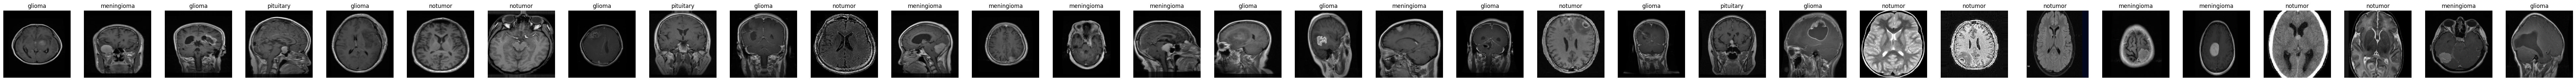

In [ ]:
# Visualizing some sample images with labels
images, labels = train_generator.next()

# Plot the images with labels
fig, axes = plt.subplots(1, batch_size, figsize=(100, 100))

# Convert class indices to a list for indexing
class_names = list(train_generator.class_indices.keys())

for i in range(batch_size):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    class_index = int(labels[i].argmax())
    class_name = class_names[class_index]
    axes[i].set_title(class_name)

plt.show()

In [ ]:
# CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # 4 classes (glioma, meningioma, notumor, pituitary)

In [ ]:
# Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model Training
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)


Epoch 1/10


178/178 [==============================] - 508s 3s/step - loss: 0.8835 - accuracy: 0.6289 - val_loss: 1.0205 - val_accuracy: 0.6664
Epoch 2/10
178/178 [==============================] - 535s 3s/step - loss: 0.5821 - accuracy: 0.7776 - val_loss: 0.5513 - val_accuracy: 0.7820
Epoch 3/10
178/178 [==============================] - 437s 2s/step - loss: 0.5154 - accuracy: 0.7993 - val_loss: 0.5244 - val_accuracy: 0.8070
Epoch 4/10
178/178 [==============================] - 307s 2s/step - loss: 0.4597 - accuracy: 0.8262 - val_loss: 0.5256 - val_accuracy: 0.7914
Epoch 5/10
178/178 [==============================] - 316s 2s/step - loss: 0.4229 - accuracy: 0.8352 - val_loss: 0.4971 - val_accuracy: 0.8023
Epoch 6/10
178/178 [==============================] - 311s 2s/step - loss: 0.3685 - accuracy: 0.8671 - val_loss: 0.4480 - val_accuracy: 0.8047
Epoch 7/10
178/178 [==============================] - 307s 2s/step - loss: 0.3403 - accuracy: 0.8739 - val_loss: 0.4170 - val_accuracy: 0.81